# Automação de tarefas

## Problema a ser resolvido
- buscar automaticamente os dados das ações no site do yahoo finance
- analisar os dados das ações de acordo com a solicitação do gestor
- enviar um e-mail com todas as análises de forma automática

# Passo 1 - buscar automaticamente os dados das ações no site do Yahoo!

In [6]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance

<Axes: xlabel='Date'>

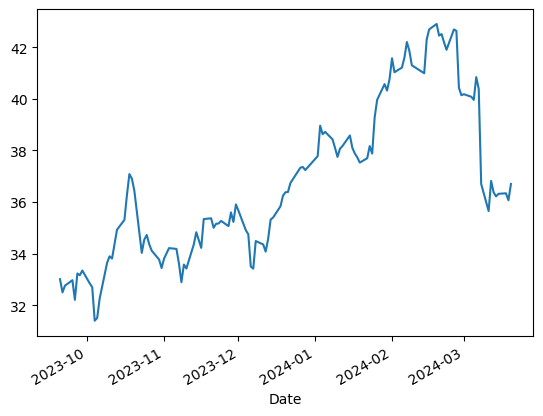

In [3]:
codigo = input("Digite o código da ação desejada:")
dados = yfinance.Ticker(codigo).history("6mo")

fechamento = dados.Close
fechamento.plot()

Date
2023-09-20 00:00:00-03:00    33.011879
2023-09-21 00:00:00-03:00    32.501633
2023-09-22 00:00:00-03:00    32.761570
2023-09-25 00:00:00-03:00    32.973370
2023-09-26 00:00:00-03:00    32.212814
                               ...    
2024-03-14 00:00:00-03:00    36.220001
2024-03-15 00:00:00-03:00    36.320000
2024-03-18 00:00:00-03:00    36.340000
2024-03-19 00:00:00-03:00    36.070000
2024-03-20 00:00:00-03:00    36.700001
Name: Close, Length: 123, dtype: float64

## Passo 2 - Análises solicitadas pelo gestor
- A análise dos últimos 6 meses
- Cotação máximo da ação
- Cotação mínimo
- Cotação atual

In [4]:
# Cotação máxima (Trouxe o maior valor da coluna "Close")
cotacao_maxima = fechamento.max()

# Cotação mínima (Trouxe o menor valor da coluna "Close")
cotacao_minima = fechamento.min()

# Cotação atual
cotacao_atual = fechamento.iloc[-1]

## Automatizando o envio de e-mail
- abrir o navegador
- abrir uma nova aba (ctrl + t)
- digitar o endereço do gmail e apertar enter
- clicar no botão escrever
- preencher o destinatário, tab
- preencher o assunto, tab
- preencher o corpo do e-mail
- clicar no botão enviar

In [12]:
# instalando o PyAutoGUI
%pip install pyautogui

Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install pyperclip

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pyautogui
import pyperclip

In [7]:
# abrir o navegador
pyautogui.click(x=656, y=747)

# configurando uma pausa entre os passos
pyautogui.PAUSE = 3

# abrir uma nova aba (ctrl + t)
pyautogui.hotkey("ctrl", "t")

# digitar o endereço do gmail e apertar enter
pyperclip.copy("www.gmail.com")
pyautogui.hotkey("ctrl", "v", "enter")

# clicar no botão escrever
pyautogui.click(x=64, y=195)

# preencher o destinatário, tab
pyperclip.copy("guilhermes.prata@gmail.com")
pyautogui.hotkey("ctrl", "v")
pyautogui.hotkey("tab")

# preencher o assunto, tab
pyperclip.copy("Análises diárias")
pyautogui.hotkey("ctrl", "v")
pyautogui.hotkey("tab")

# preencher o corpo do e-mail
mensagem = f"""
Prezado Gestor,

Seguem as análises dos últimos seis meses da ação {codigo} conforme solicitado:

Cotação máxima: R$ {round(cotacao_maxima, 2)}
Cotação mínima: R$ {round(cotacao_minima, 2)}
Cotaçãoo atual: R$ {round(cotacao_atual, 2)}

Qualquer dúvida, estou à disposição!

Att.
"""

pyperclip.copy(mensagem)
pyautogui.hotkey("ctrl", "v")

# clicar no botão enviar
pyautogui.click(x=875, y=713)

In [6]:
import time

time.sleep(5)
pyautogui.position()

Point(x=656, y=747)